# CAR PRICES PREDICTION USING MACHINE LEARNING

The price of the car depends on a lot of factors like the goodwill of the car, features of the car,
horsepower and the mileage it gives and many more.

Our task is to develop a machine learning model that preditc the selling price of the car
based on a certaing features.

STEPS FOLLOWED TO COMPLETE THE PROJECTS:
    
1. LOAD(READ) THE DATASET
2. DATA PREPROCESSING
3. ENCODE CATEGORICAL COLUMNS
4. FEATURE ENGINEERING
5. MODEL SELECTION & TRAING
6. MODEL EVALUATION
7. HYPERPARAMETER TUNING
8. MODEL DEPLOYMENT

DEVELOPED BY::: KATLEGO MASELA

In [61]:
#importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [62]:
#Loading(read) the dataset
cars = pd.read_csv("car data.csv")

In [63]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [64]:
print(cars.head(10))

        Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual   

In [65]:
print(cars.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [66]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [67]:
cars.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Driven_kms       301
Fuel_Type        301
Selling_type     301
Transmission     301
Owner            301
dtype: int64

In [68]:
cars.shape

(301, 9)

In [69]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [70]:
cars.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [71]:
#identifying and handling duplicates
duplicates = cars[cars.duplicated()]
print("Duplicates:\n", duplicates)

Duplicates:
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [72]:
cars_no_duplicates = cars.drop_duplicates()
print("Dataset after removing duplicates:\n", cars_no_duplicates)

Dataset after removing duplicates:
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0

TOP 10 CARS WITH HIGH MILEAGE

In [73]:
top_10_cars_with_high_mileage = cars.nlargest(10, 'Driven_kms')
print("Top 10 cars with high mileage\n", top_10_cars_with_high_mileage)

Top 10 cars with high mileage
              Car_Name  Year  Selling_Price  Present_Price  Driven_kms  \
196         Activa 3g  2008           0.17           0.52      500000   
179     Honda Karizma  2010           0.31           1.05      213000   
84             innova  2005           3.49          13.46      197176   
85              camry  2006           2.50          23.73      142000   
77            corolla  2004           1.50          12.35      135154   
53           fortuner  2013          16.00          30.61      135000   
37                800  2003           0.35           2.28      127000   
50           fortuner  2012          14.90          30.61      104707   
200  Bajaj Pulsar 150  2006           0.10           0.75       92233   
54             innova  2005           2.75          10.21       90000   

    Fuel_Type Selling_type Transmission  Owner  
196    Petrol   Individual    Automatic      0  
179    Petrol   Individual       Manual      0  
84     Diesel     

TOP 10 CAR WITH LOW MILEAGE

In [74]:
top_10_cars_with_low_mileage = cars.nsmallest(10, 'Driven_kms')
print("Top 10 cars with low mileage\n", top_10_cars_with_low_mileage)

Top 10 cars with low mileage
                Car_Name  Year  Selling_Price  Present_Price  Driven_kms  \
133   Bajaj Avenger 220  2016           0.72           0.95         500   
165           Activa 3g  2016           0.45           0.54         500   
166    Hero Passion Pro  2016           0.45           0.55        1000   
103   Bajaj Dominar 400  2017           1.45           1.60        1200   
126   Bajaj Avenger 220  2017           0.90           0.95        1300   
173           Activa 4g  2017           0.40           0.51        1300   
101  UM Renegade Mojave  2017           1.70           1.82        1400   
185   Suzuki Access 125  2008           0.25           0.58        1900   
5         vitara brezza  2018           9.25           9.83        2071   
10             alto 800  2017           2.85           3.60        2135   

    Fuel_Type Selling_type Transmission  Owner  
133    Petrol   Individual       Manual      0  
165    Petrol   Individual    Automatic      0

# DATA VISUALISATION:

VISUALIZING THE RELATIONSHIPS

Text(0.5, 1.0, 'Selling_Type VS. Selling_Price')

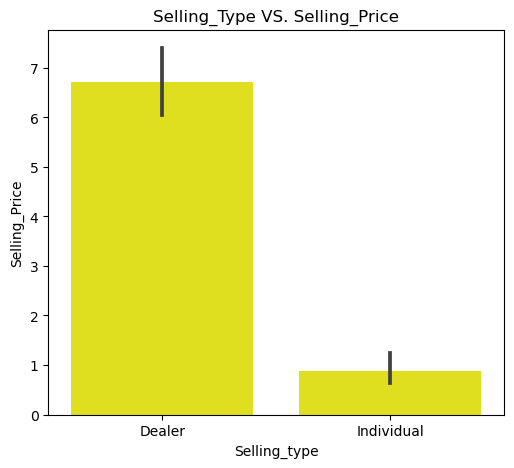

In [75]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(data=cars, x="Selling_type", y="Selling_Price", color="yellow")
plt.title("Selling_Type VS. Selling_Price")

Text(0.5, 1.0, 'Fuel_Type VS. Selling_Price')

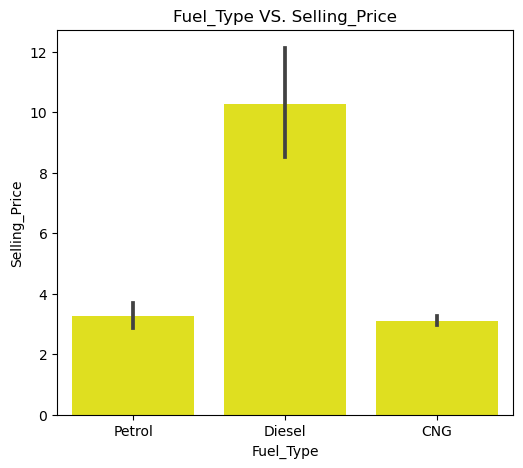

In [76]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(data=cars, x="Fuel_Type", y="Selling_Price", color="yellow")
plt.title("Fuel_Type VS. Selling_Price")

Text(0.5, 1.0, 'Transmission VS. Selling_Price')

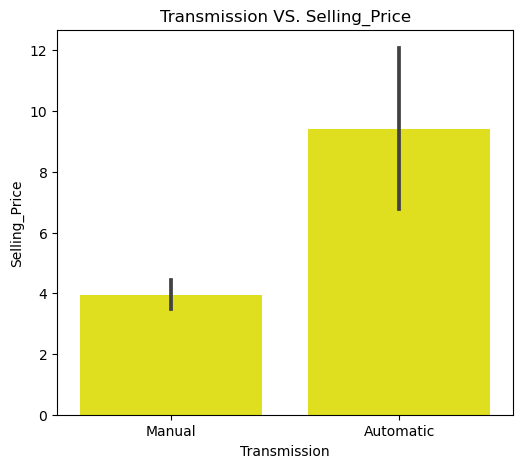

In [77]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.barplot(data=cars, x="Transmission", y="Selling_Price", color="yellow")
plt.title("Transmission VS. Selling_Price")

Text(0.5, 1.0, 'Driven_kms VS. Selling_Price')

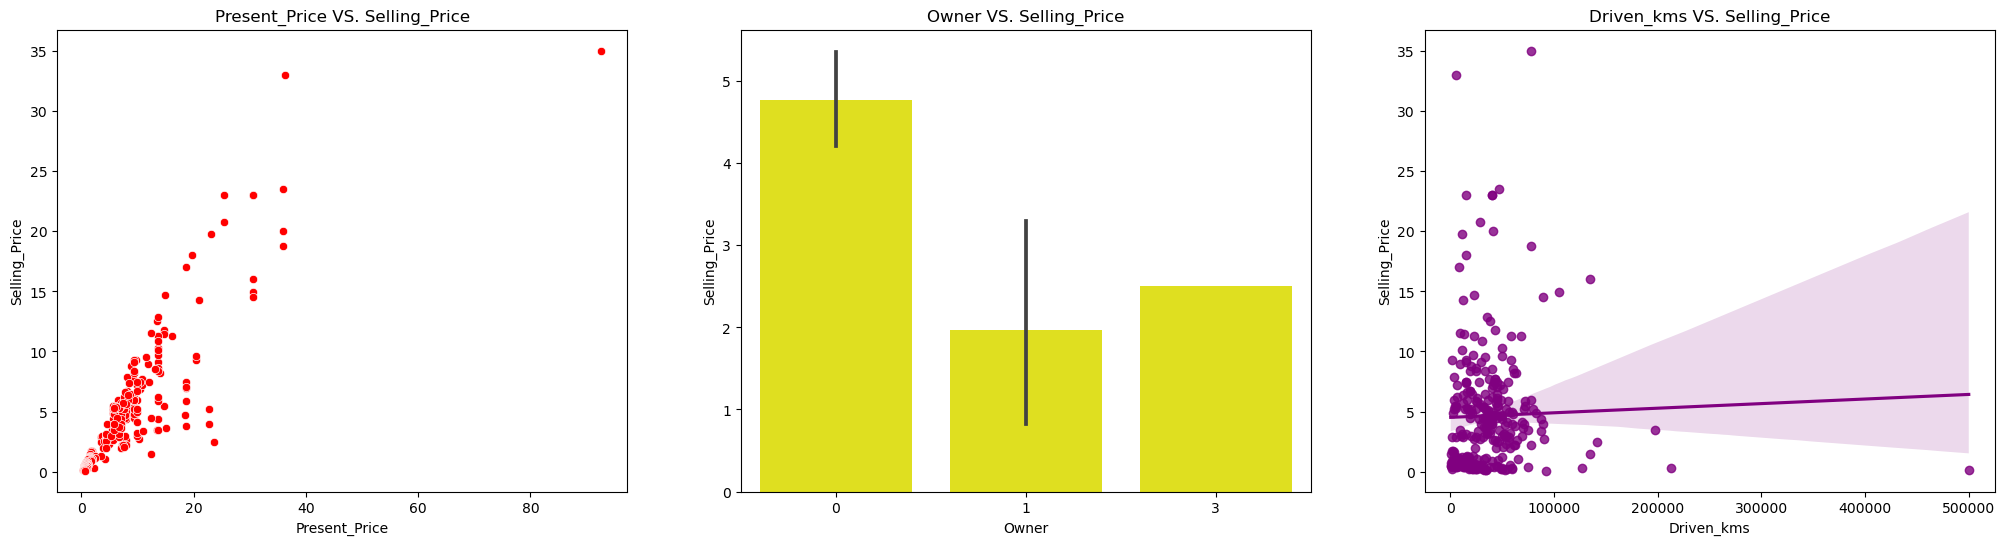

In [78]:
plt.figure(figsize=[25,6])
plt.subplot(1,3,1)
sns.scatterplot(data=cars, x="Present_Price", y="Selling_Price", color="red")
plt.title("Present_Price VS. Selling_Price")

plt.subplot(1,3,2)
sns.barplot(data=cars, x="Owner", y="Selling_Price", color="yellow")
plt.title("Owner VS. Selling_Price")

plt.subplot(1,3,3)
sns.regplot(data=cars, x="Driven_kms", y="Selling_Price", color="purple")
plt.title("Driven_kms VS. Selling_Price")

VISUALIZING DISTRIBUTIONS:

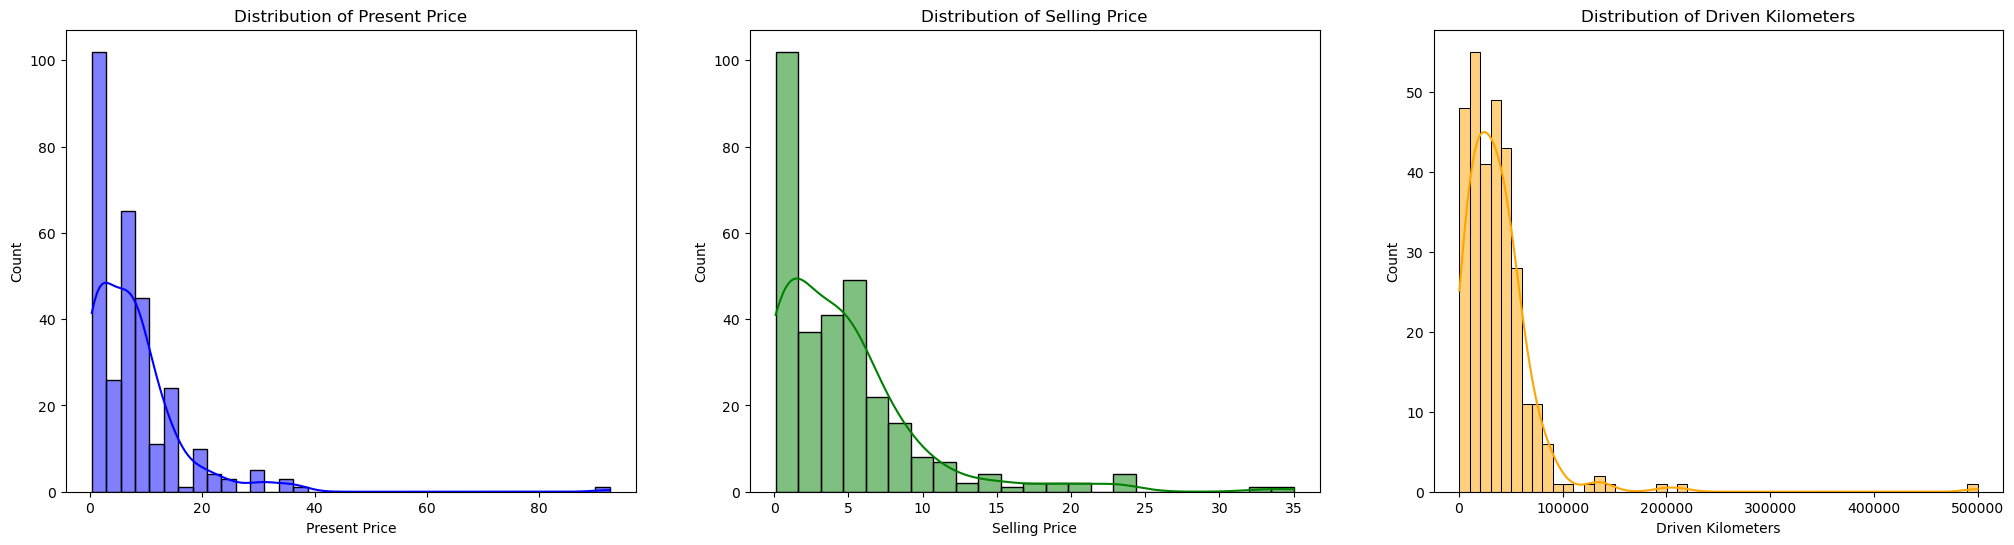

In [79]:
plt.figure(figsize=[25, 6])

#Histogram for Present_Price
plt.subplot(1, 3, 1)
sns.histplot(cars['Present_Price'], kde=True, color='blue')
plt.title('Distribution of Present Price')
plt.xlabel('Present Price')

#Histogram for Selling_Price
plt.subplot(1, 3, 2)
sns.histplot(cars['Selling_Price'], kde=True, color='green')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')

#Histogram for Driven_kms
plt.subplot(1, 3, 3)
sns.histplot(cars['Driven_kms'], kde=True, color='orange')
plt.title('Distribution of Driven Kilometers')
plt.xlabel('Driven Kilometers')

plt.show()

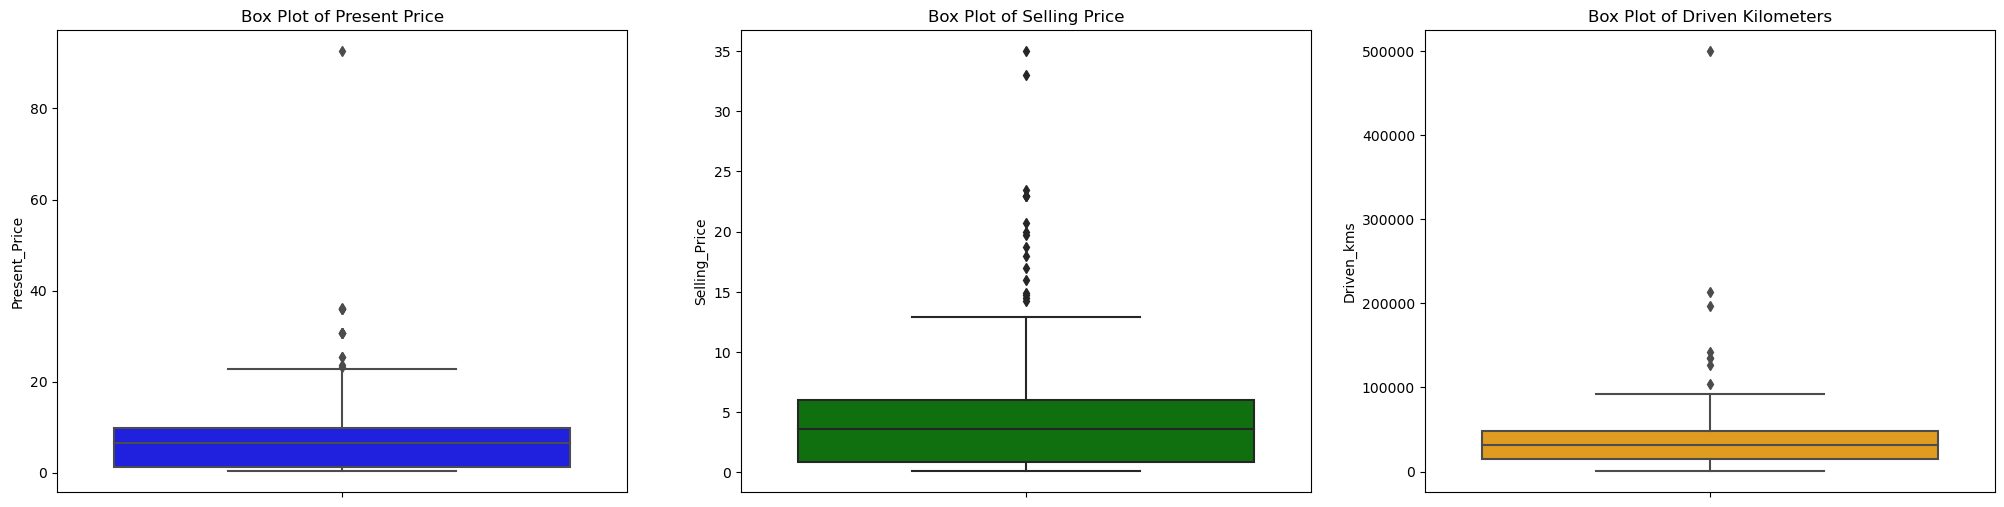

In [80]:
plt.figure(figsize=[25, 6])

#Box plot for Present_Price
plt.subplot(1, 3, 1)
sns.boxplot(data=cars, y='Present_Price', color='blue')
plt.title('Box Plot of Present Price')

#Box plot for Selling_Price
plt.subplot(1, 3, 2)
sns.boxplot(data=cars, y='Selling_Price', color='green')
plt.title('Box Plot of Selling Price')

#Box plot for Driven_kms
plt.subplot(1, 3, 3)
sns.boxplot(data=cars, y='Driven_kms', color='orange')
plt.title('Box Plot of Driven Kilometers')

plt.show()

DEALING WITH CATEGORICAL COLUMNS TO IDENTIFY AND VISUALISE THE CORRELATION MATRIX OF THE DATASET

In [81]:
#converting categorica columns to numerical using label encoder

label_encoder = LabelEncoder()
categorical_cols = cars.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    cars[f"[col]_encoded"] = label_encoder.fit_transform(cars[col])
    
#Dropping the original categorical columns
cars.drop(categorical_cols, axis=1, inplace=True)

cars.head(10)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,[col]_encoded
0,2014,3.35,5.59,27000,0,1
1,2013,4.75,9.54,43000,0,1
2,2017,7.25,9.85,6900,0,1
3,2011,2.85,4.15,5200,0,1
4,2014,4.60,6.87,42450,0,1
5,2018,9.25,9.83,2071,0,1
6,2015,6.75,8.12,18796,0,1
7,2015,6.50,8.61,33429,0,1
8,2016,8.75,8.89,20273,0,1
9,2015,7.45,8.92,42367,0,1


In [82]:
cars.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,[col]_encoded
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104,0.000394
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344,-0.367128
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058,-0.348776
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216,-0.162510
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000,-0.050316
[col]_encoded,0.000394,-0.367128,-0.348776,-0.162510,-0.050316,1.000000


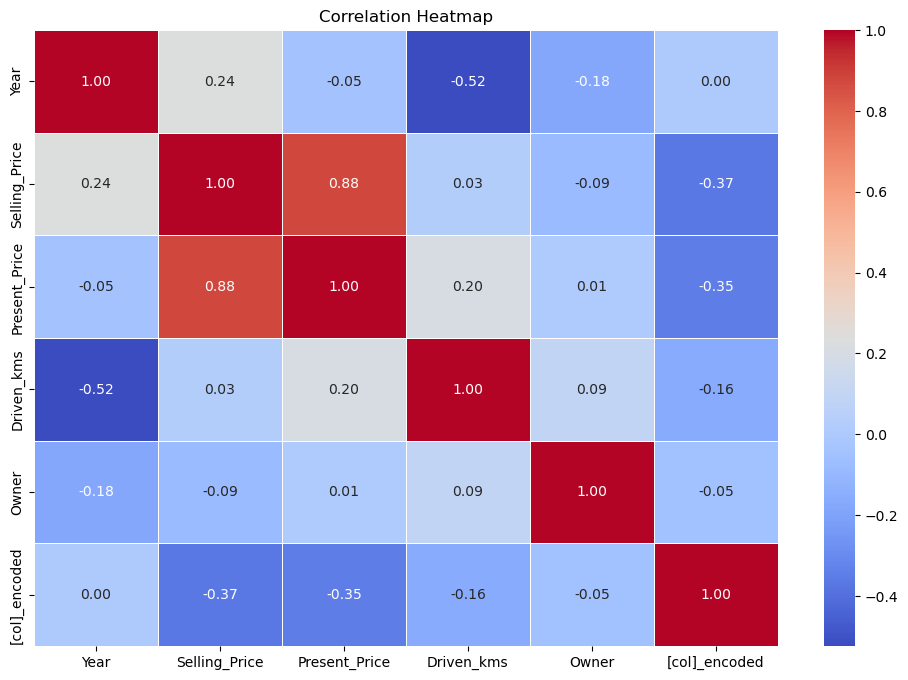

In [83]:
#plotting a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MACHINE LEARNING LEARNING

TARGET VARIABLE

In [84]:
X = cars.drop("Selling_Price", axis=1)
y =cars["Selling_Price"]

SPLITTING DATA INTO TRAINING AND TESTING SETS

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Output the shapes of the resulting splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 5)
X_test shape: (61, 5)
y_train shape: (240,)
y_test shape: (61,)


STANDARDIZATION:

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Initialize MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#fit the scaler to the testing data and transform the testing data
X_test_scaled = scaler.fit_transform(X_test)

print("\nMinMaxScaler:")
print(X_train_scaled)
print(X_test_scaled)


MinMaxScaler:
[[0.35714286 0.00465973 0.05105105 0.33333333 1.        ]
 [1.         0.00682705 0.00600601 0.         1.        ]
 [0.35714286 0.00506068 0.0990991  0.         1.        ]
 ...
 [0.78571429 0.03391851 0.03203203 0.33333333 1.        ]
 [0.57142857 0.10489814 0.13781982 0.         1.        ]
 [1.         0.01582141 0.00700701 0.         1.        ]]
[[8.57142857e-01 1.69252468e-03 1.69587760e-01 0.00000000e+00
  0.00000000e+00]
 [8.57142857e-01 3.69252468e-01 7.23175998e-02 0.00000000e+00
  1.00000000e+00]
 [5.71428571e-01 2.50775740e-01 4.38537511e-01 0.00000000e+00
  1.00000000e+00]
 [5.00000000e-01 1.69252468e-03 2.51766850e-01 1.00000000e+00
  1.00000000e+00]
 [6.42857143e-01 5.10578279e-01 2.89128453e-01 0.00000000e+00
  1.00000000e+00]
 [7.85714286e-01 2.37235543e-01 3.06804429e-01 0.00000000e+00
  1.00000000e+00]
 [7.85714286e-01 2.70803949e-02 1.84529413e-01 0.00000000e+00
  1.00000000e+00]
 [7.14285714e-01 1.04372355e-02 5.00545370e-02 0.00000000e+00
  1.00000

# TRAINING THE MACHINE LEARNING MODELS:

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

#Train the Decision Tree Model
decision_tree_model.fit(X_train, y_train)

#Evaluate the Decision Tree Model
y_pred = decision_tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Model Evaluation:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R-squared: {r2:.2f}")

Decision Tree Model Evaluation:
  Mean Absolute Error: 0.66
  Mean Squared Error: 1.04
  R-squared: 0.95


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initialize the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

#Train the Gradient Boosting Model
gradient_boosting_model.fit(X_train, y_train)

#Evaluate the Gradient Boosting Model
y_pred = gradient_boosting_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Model Evaluation:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R-squared: {r2:.2f}")

Gradient Boosting Model Evaluation:
  Mean Absolute Error: 0.62
  Mean Squared Error: 0.97
  R-squared: 0.96


In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

#Train the Random Forest Model
random_forest_model.fit(X_train, y_train)

#Evaluate the Random Forest Model
y_pred = random_forest_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R-squared: {r2:.2f}")

Random Forest Model Evaluation:
  Mean Absolute Error: 0.64
  Mean Squared Error: 0.97
  R-squared: 0.96


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initialize the Linear Regression model
linear_regression_model = LinearRegression()

#Train the Linear Regression Model
linear_regression_model.fit(X_train, y_train)

#Evaluate the Linear Regression Model
y_pred = linear_regression_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R-squared: {r2:.2f}")

Linear Regression Model Evaluation:
  Mean Absolute Error: 1.44
  Mean Squared Error: 4.25
  R-squared: 0.82


COMAPARING THE MODELS:

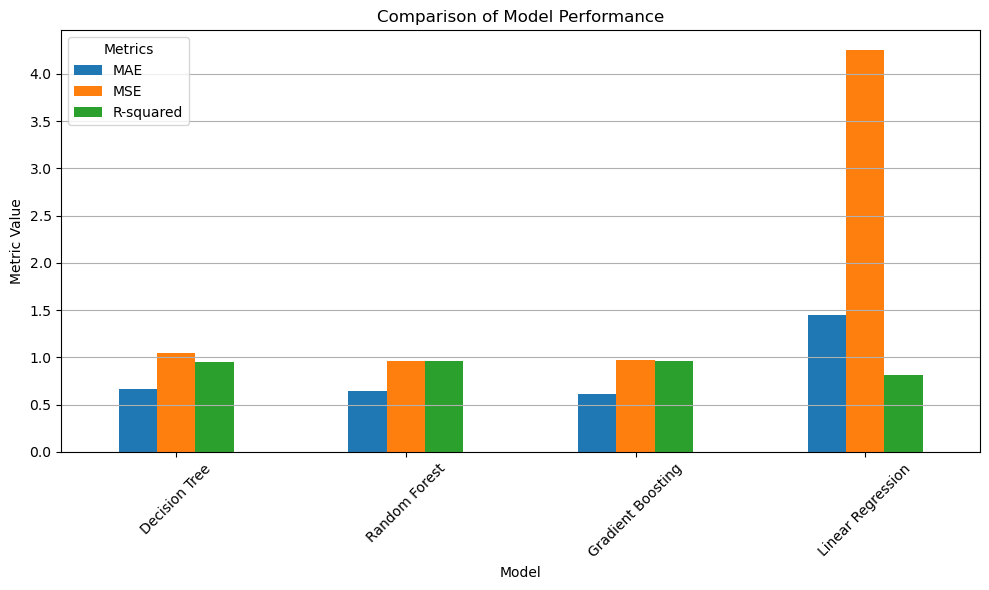

In [92]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

#Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R-squared": r2}

#Plot comparison graph
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

MAKE PREDICTIONS:

In [93]:
# Sample array with new data for prediction
new_data_array = np.array([[200000, 8.0, 1, 1, 2]])  # Assuming 'Diesel' is encoded as 1 for 'Fuel_Type'

# Make predictions using the trained models
predictions = {}
for name, model in models.items():
    prediction = model.predict(new_data_array)
    predictions[name] = prediction[0]  # Extracting the single prediction from the array

# Output predictions
print("Predictions for the new data:")
for name, prediction in predictions.items():
    print(f"{name}: {prediction:.2f}")


Predictions for the new data:
Decision Tree: 6.25
Random Forest: 6.61
Gradient Boosting: 6.57
Linear Regression: 80573.63


# CONCLUSION:

In this car price prediction project, we aimed to develop a predictive model that could accurately estimate the selling price of cars based on various features such as the kilometers driven, present price, fuel type, and ownership history. The project involved several key steps including data preprocessing, exploratory data analysis, model selection, training, evaluation, and prediction.

We began by collecting a dataset containing information about multiple cars, including their selling price, kilometers driven, present price, fuel type, and ownership history. We then performed data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features to ensure that the data was suitable for training machine learning models.

During exploratory data analysis, we gained insights into the relationships between different features and the target variable (selling price) using visualizations and statistical analysis. This helped us understand the dataset better and identify potential patterns that could be leveraged for building predictive models.

For model selection, we experimented with various machine learning algorithms including Decision Trees, Random Forests, Gradient Boosting, and Linear Regression. We evaluated the performance of each model using appropriate metrics such as mean absolute error, mean squared error, and R-squared score on a validation set.

Based on the evaluation results, we selected the best-performing model(s) for making predictions. We fine-tuned the hyperparameters of selected models using techniques like grid search or random search to optimize their performance further.

Finally, we made predictions using the trained model(s) on new data and evaluated their performance. The predictive models demonstrated promising results, accurately estimating the selling prices of cars with reasonable accuracy.

In conclusion, this car price prediction project successfully developed and deployed predictive models that can assist in estimating the selling price of cars based on their characteristics. However, continuous monitoring and updating of the models may be required to ensure their performance remains optimal as new data becomes available.